# Machin Learning Model to predict Customer Churn Analysis 

In [5]:

#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#acquiring the train data
data=pd.read_csv("Telecom customer churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
data.shape

(7043, 21)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
data["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [17]:
data["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Text(0.5, 1.0, 'Churn Quantity Graph')

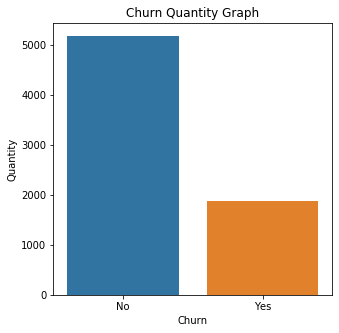

In [18]:
#checking the types of churns and its graphical representation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=data, x="Churn")
ax.set_xlabel("Churn")
ax.set_ylabel('Quantity')
ax.set_title('Churn Quantity Graph')

In [19]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in data.columns:
    data[col] = le_x.fit_transform(data[col])

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


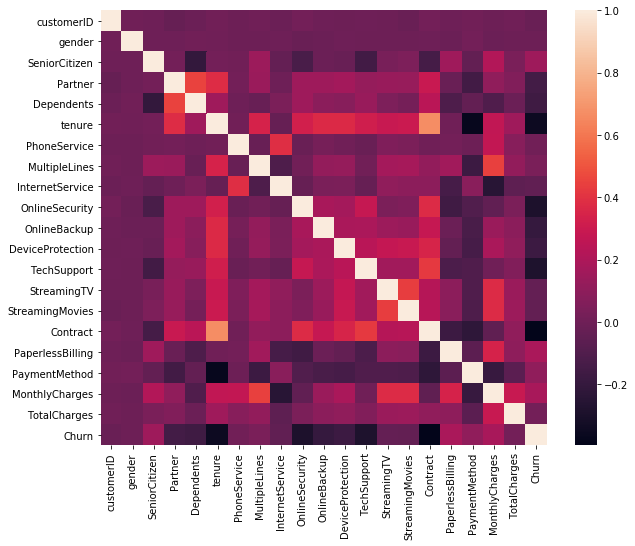

In [21]:
#checking for the correlation
corr_hmap=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap)

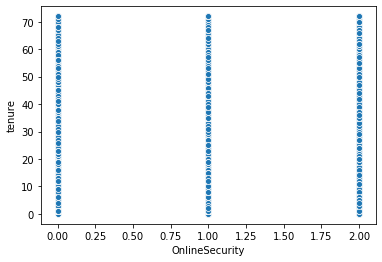

In [29]:
#vizualizing the class
sns.scatterplot(x='OnlineSecurity',y='tenure',data=data)

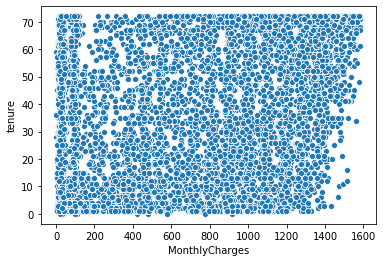

In [31]:
#vizualizing the class
sns.scatterplot(x='MonthlyCharges',y='tenure',data=data)

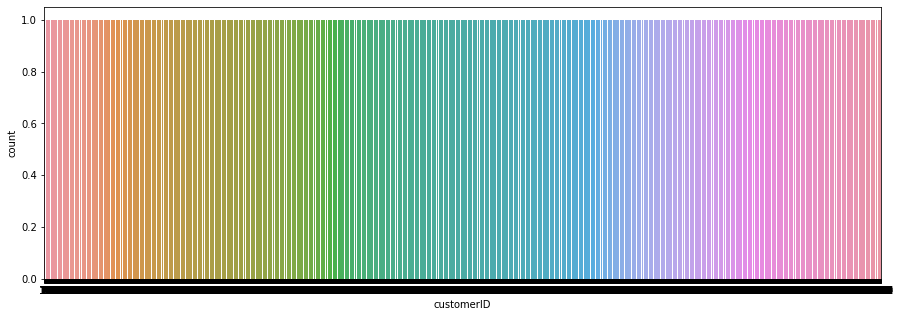

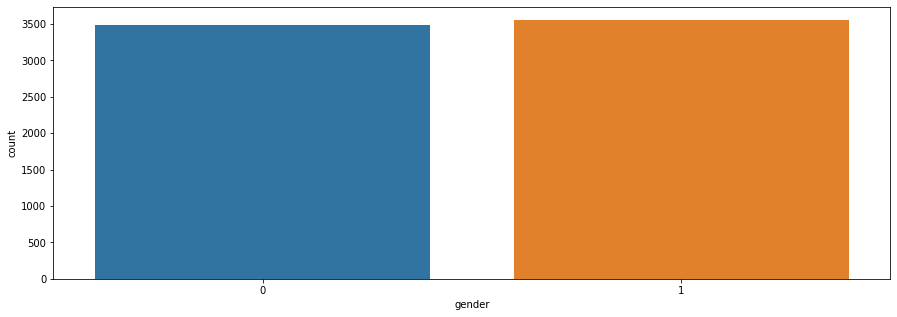

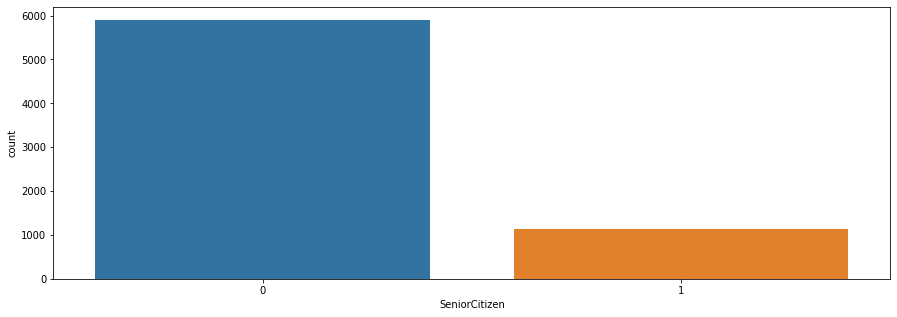

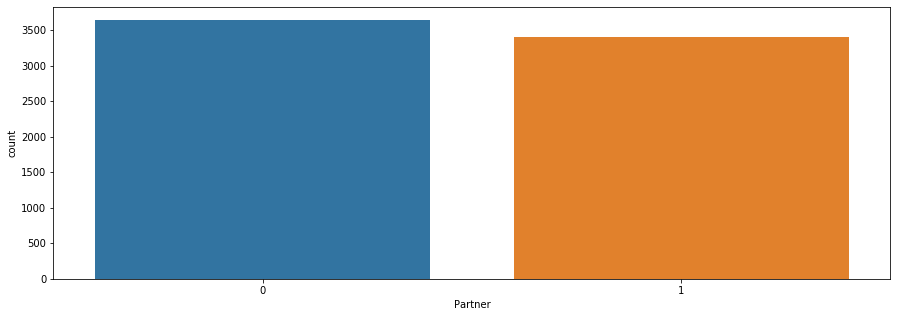

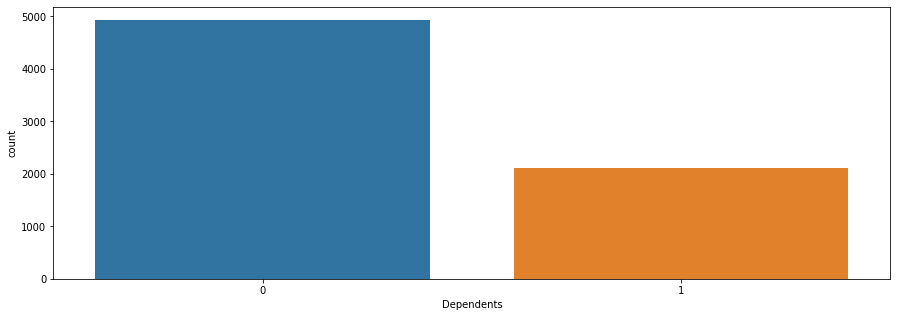

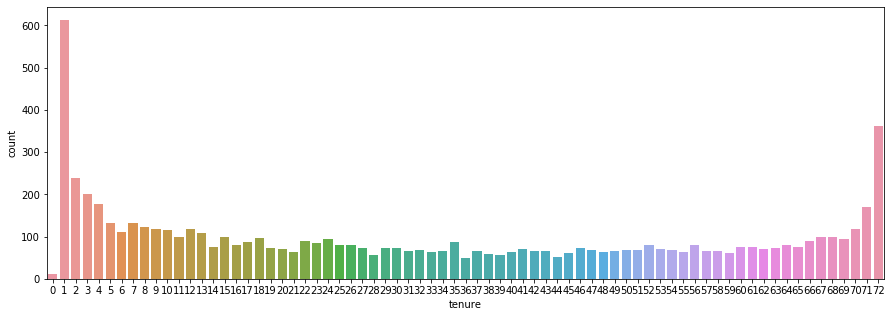

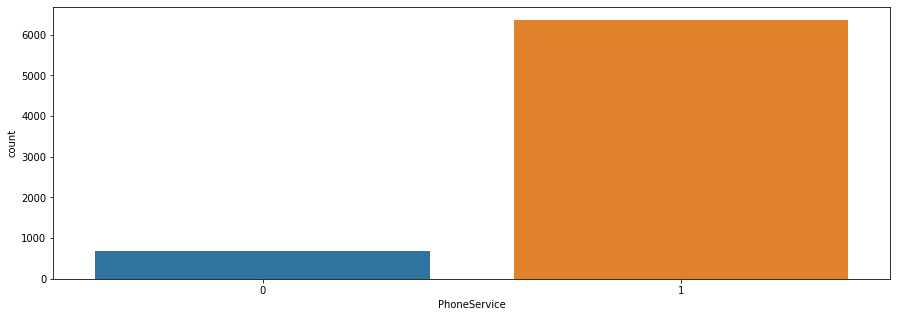

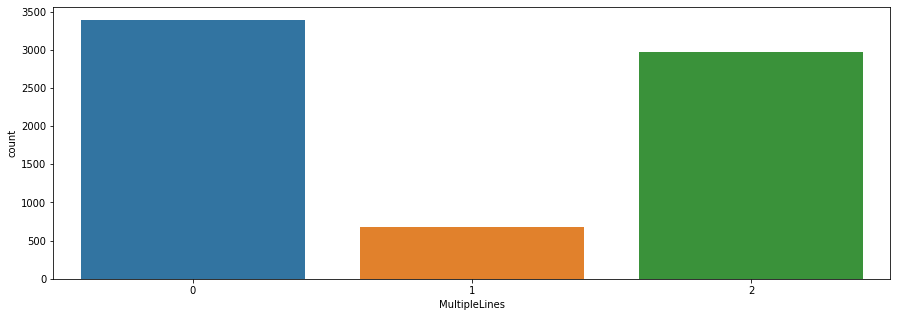

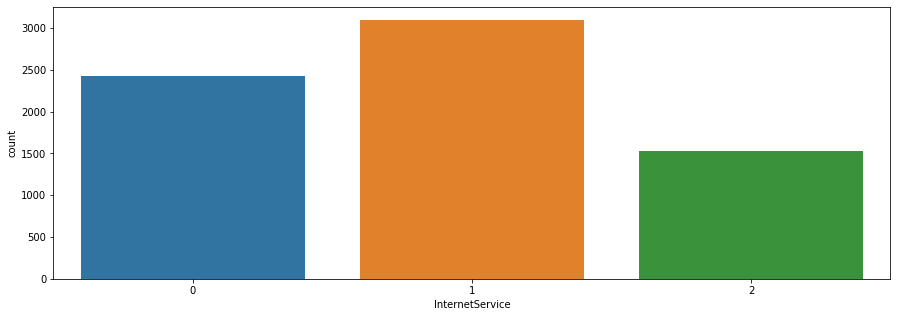

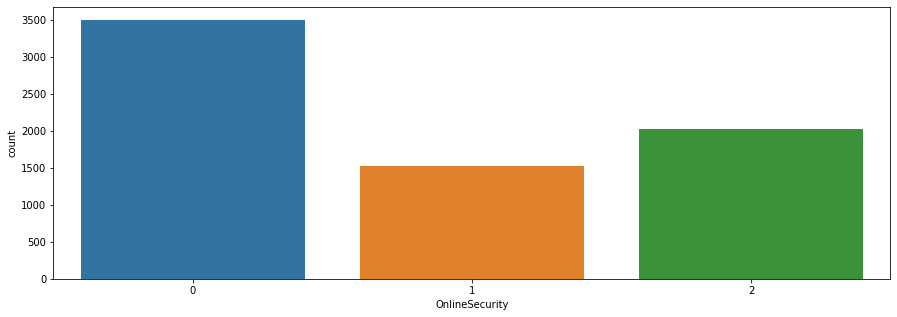

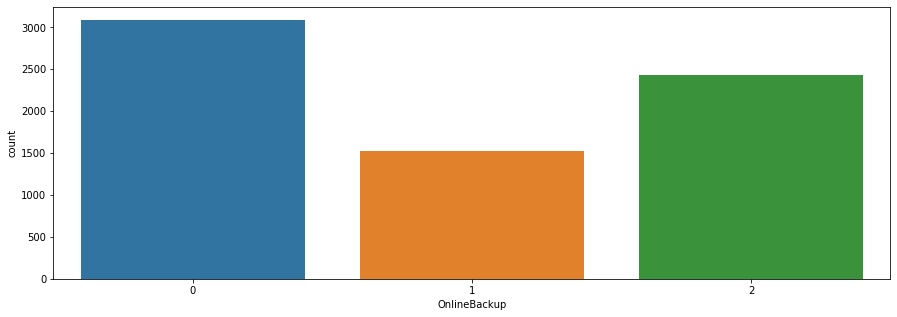

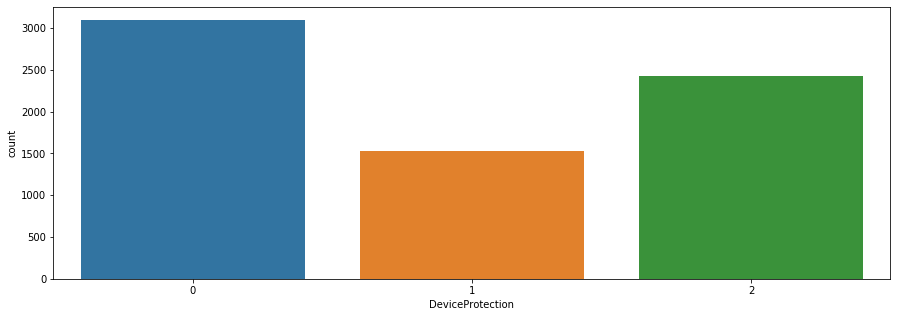

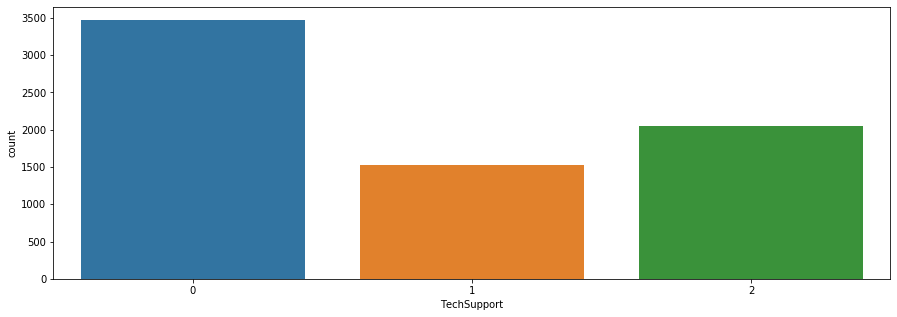

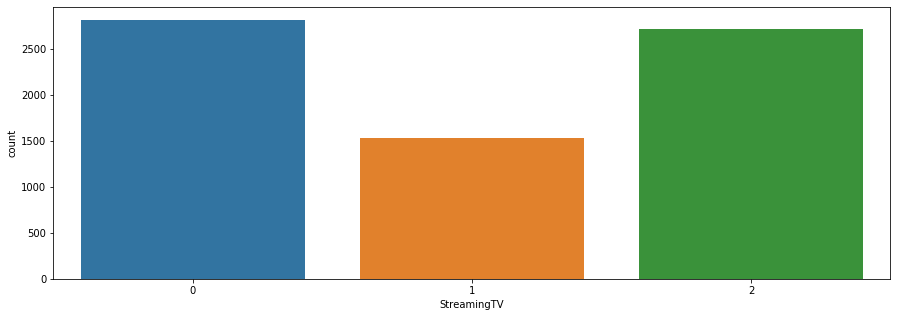

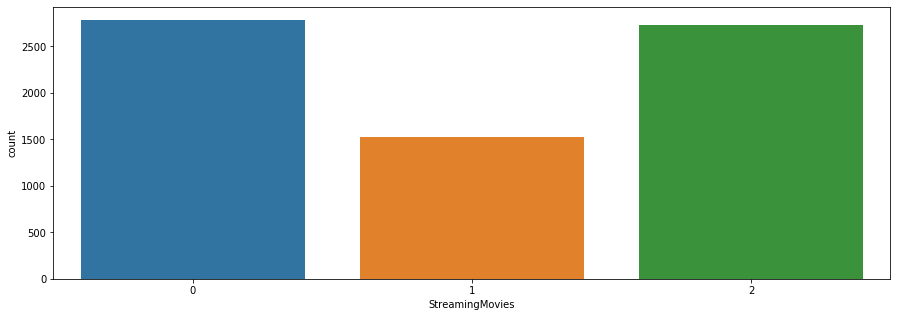

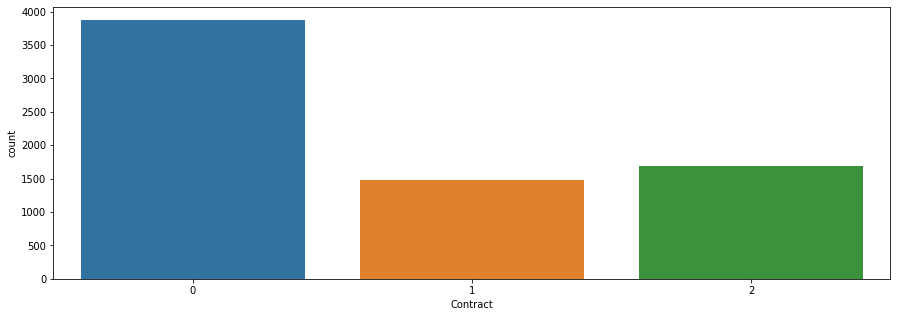

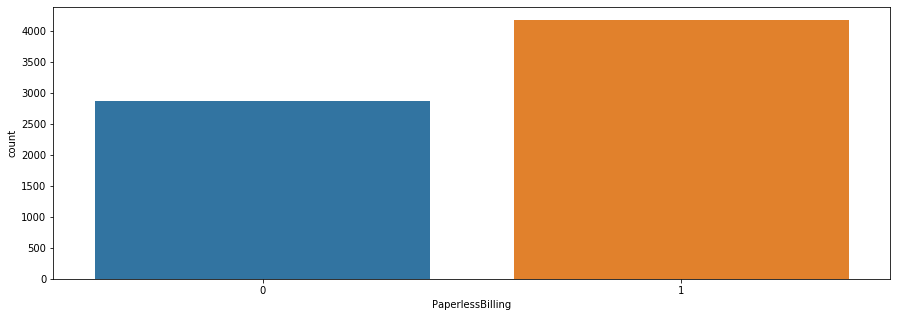

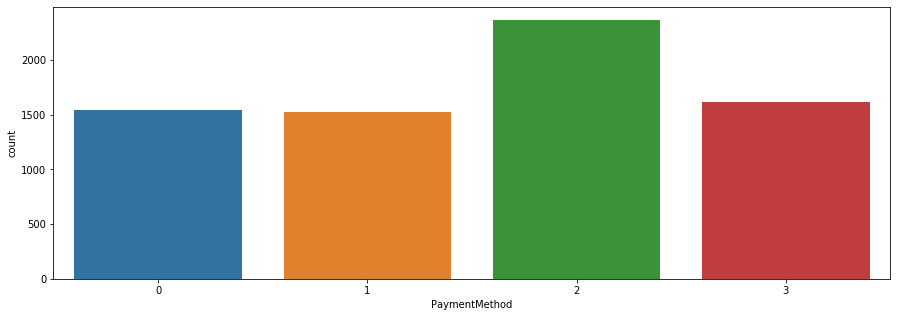

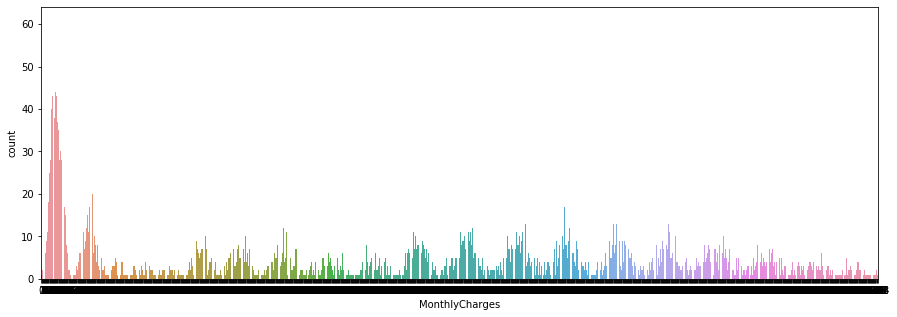

In [ ]:
#printing different countplot
data_columns=data.columns
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(15,5))
    sns.countplot(data=data,x=data_columns[i])

customerID             AxesSubplot(0.125,0.799681;0.227941x0.0803191)
gender              AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
SeniorCitizen       AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Partner                AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Dependents          AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
tenure              AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
PhoneService           AxesSubplot(0.125,0.606915;0.227941x0.0803191)
MultipleLines       AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
InternetService     AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
OnlineSecurity         AxesSubplot(0.125,0.510532;0.227941x0.0803191)
OnlineBackup        AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
DeviceProtection    AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
TechSupport            AxesSubplot(0.125,0.414149;0.227941x0.0803191)
StreamingTV         AxesSubplot(0.398529,0.414149;0.227941x0.0803191)
StreamingMovies     

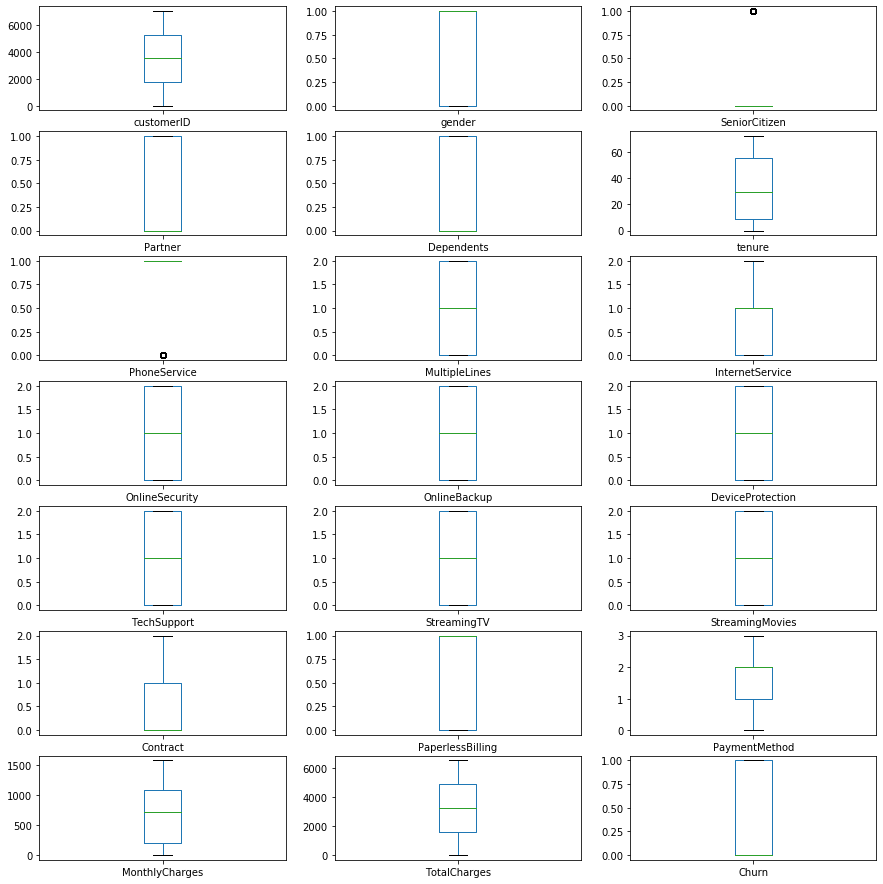

In [35]:
#checking for the outliers
data.plot(kind='box',subplots=True,layout=(8,3),figsize=(15,18))

In [37]:
#checking the skewness before removing the outliers
print(data.skew())

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges      0.014263
TotalCharges        0.015857
Churn               1.063031
dtype: float64


In [39]:
#removing outliers
z_score=np.abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(7043, 21)
(6361, 21)


In [40]:
#checking for the statastical report
data_final.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.0,6361.000000,6361.000000,6361.000000,...,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000
mean,3516.684012,0.503694,0.163182,0.485930,0.299324,32.439082,1.0,0.934130,0.966515,0.785726,...,0.905518,0.791699,1.001415,1.005188,0.691086,0.594875,1.572866,726.015564,3309.241000,0.267096
std,2033.617910,0.500026,0.369561,0.499841,0.457998,24.595120,0.0,0.997907,0.715712,0.845162,...,0.866771,0.846655,0.871905,0.871891,0.834212,0.490955,1.068744,482.194577,1896.790942,0.442478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1753.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000,1610.000000,0.000000
50%,3507.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.0,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,801.000000,3385.000000,0.000000
75%,5276.000000,1.000000,0.000000,1.000000,1.000000,56.000000,1.0,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1118.000000,4969.000000,1.000000
max,7041.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.0,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


In [41]:
#Now separating input and output variable
x=data_final.drop(['Churn'],axis=1)
y=data_final['Churn']
print(x.shape)
print(y.shape)

(6361, 20)
(6361,)


In [42]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.21899443,  0.99263832, -0.44159123, ...,  1.33544287,
        -0.47290762, -0.97184453],
       [-0.46850438,  0.99263832, -0.44159123, ...,  1.33544287,
        -0.60149653, -1.66201174],
       [ 1.4725241 , -1.00741628, -0.44159123, ...,  0.39969137,
         0.00618976, -1.25708552],
       ...,
       [-0.97945665, -1.00741628, -0.44159123, ..., -0.53606013,
         1.27341271,  1.25946763],
       [ 1.18877101,  0.99263832,  2.26453771, ...,  1.33544287,
         0.14307473, -0.34231081],
       [-0.6347237 ,  0.99263832, -0.44159123, ..., -1.47181163,
         1.37296542,  1.10603855]])

In [43]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [45]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.8116169544740973
random state:  43  accuracy score:  0.8100470957613815
random state:  44  accuracy score:  0.8100470957613815
random state:  45  accuracy score:  0.7959183673469388
random state:  46  accuracy score:  0.7880690737833596
random state:  47  accuracy score:  0.8163265306122449
random state:  48  accuracy score:  0.7786499215070644
random state:  49  accuracy score:  0.8288854003139717
random state:  50  accuracy score:  0.8131868131868132
random state:  51  accuracy score:  0.8037676609105181
random state:  52  accuracy score:  0.8021978021978022
random state:  53  accuracy score:  0.8210361067503925
random state:  54  accuracy score:  0.8116169544740973
random state:  55  accuracy score:  0.7912087912087912
random state:  56  accuracy score:  0.783359497645212
random state:  57  accuracy score:  0.8320251177394035
random state:  58  accuracy score:  0.8006279434850864
random state:  59  accuracy score:  0.7959183673469388
random s

random state:  73  accuracy score:  0.7237048665620094
random state:  74  accuracy score:  0.717425431711146
random state:  75  accuracy score:  0.7127158555729984
random state:  76  accuracy score:  0.7409733124018838
random state:  77  accuracy score:  0.728414442700157
random state:  78  accuracy score:  0.7189952904238619
random state:  79  accuracy score:  0.706436420722135
random state:  80  accuracy score:  0.7268445839874411
random state:  81  accuracy score:  0.7205651491365777
random state:  82  accuracy score:  0.7346938775510204
random state:  83  accuracy score:  0.6985871271585558
random state:  84  accuracy score:  0.750392464678179
random state:  85  accuracy score:  0.7394034536891679
random state:  86  accuracy score:  0.7535321821036107
random state:  87  accuracy score:  0.7111459968602826
random state:  88  accuracy score:  0.750392464678179
random state:  89  accuracy score:  0.728414442700157
random state:  90  accuracy score:  0.695447409733124
random state:  91

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
y_pred = clf.predict(x_test)

In [49]:
clf.score(x_test, y_test)

0.7456828885400314

In [50]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.8027730826840361
Cross Validation Score(Std):  0.016771064864044512

Model name:  KNN
Cross Validation Score(Mean):  0.750177497446327
Cross Validation Score(Std):  0.01611051602115961

Model name:  DT
Cross Validation Score(Mean):  0.7362076468190166
Cross Validation Score(Std):  0.026805760761075912

Model name:  GNB
Cross Validation Score(Mean):  0.7562925707584981
Cross Validation Score(Std):  0.020856756680384253

Model name:  SVC
Cross Validation Score(Mean):  0.7971779051178811
Cross Validation Score(Std):  0.016912827254080436



In [51]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",83.202512,80.277308
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",79.591837,75.017750
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",75.824176,73.620765
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",79.277865,75.629257
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",83.359498,79.717791


In [52]:
# Boosting methods
boosters=[]
boosters.append(('AB', AdaBoostClassifier()))
boosters.append(('GBM', GradientBoostingClassifier()))
boosters.append(('RF', RandomForestClassifier()))
boosters.append(('ET', ExtraTreesClassifier()))

In [53]:

results = []
names = []
for name, model in boosters:
    cv_results = cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_results)
    names.append(name)    
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_results.mean())
    print("Cross Validation Score(Std): ",cv_results.std())
    print()

Model name:  AB
Cross Validation Score(Mean):  0.7954240013192068
Cross Validation Score(Std):  0.01396103949291784

Model name:  GBM
Cross Validation Score(Mean):  0.8052126991979404
Cross Validation Score(Std):  0.013496867217066763

Model name:  RF
Cross Validation Score(Mean):  0.7947282113296045
Cross Validation Score(Std):  0.01634840624542825

Model name:  ET
Cross Validation Score(Mean):  0.7818077714107725
Cross Validation Score(Std):  0.019915429032084007



In [55]:

#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.10)
model_name=SVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.8335949764521193
confusion matrix: 
[[446  35]
 [ 71  85]]
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       481
           1       0.71      0.54      0.62       156

    accuracy                           0.83       637
   macro avg       0.79      0.74      0.75       637
weighted avg       0.82      0.83      0.83       637

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1

In [56]:
#saving the model as pickle in a file
pickle.dump(model_name,open('Customer_churn_data.pkl','wb'))

In [57]:
#loading the model for testing
loaded_model=pickle.load(open('Customer_churn_data.pkl','rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,